Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [80]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3536497352538584461, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7682472070344856699
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11958804060139345331
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701401920
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3671180960176786762
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [81]:
!cat /proc/meminfo
#the gpu info

MemTotal:       13333556 kB
MemFree:          160656 kB
MemAvailable:   10763040 kB
Buffers:           81900 kB
Cached:          8702144 kB
SwapCached:            0 kB
Active:          4923056 kB
Inactive:        7595656 kB
Active(anon):    1914516 kB
Inactive(anon):    14676 kB
Active(file):    3008540 kB
Inactive(file):  7580980 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               748 kB
Writeback:             0 kB
AnonPages:       3734732 kB
Mapped:           856868 kB
Shmem:             15288 kB
Slab:             387024 kB
SReclaimable:     337840 kB
SUnreclaim:        49184 kB
KernelStack:        4480 kB
PageTables:        16196 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    6452104 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [82]:
data_path = "/content/drive/My\ Drive/Colab\ Notebooks/Experiments/CASIA2/casia2_ela_zip.zip"

In [83]:
!cp $data_path .

In [45]:
!unzip casia2_ela_zip.zip -d data

Archive:  casia2_ela_zip.zip
replace data/casia2_ela/aut/Au_ani_00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [84]:
!pwd


/content


In [85]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [86]:
data_path = "data/casia2_ela/"

In [87]:
#nor_es
import os
import io
import numpy as np
from keras.preprocessing import image
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model, Sequential 
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping




In [88]:
def jpeg_compression(img: Image.Image, quality: int=90) -> Image.Image:
    if img.mode != 'RGB':
        img = img.convert('RGB')
    buffer = io.BytesIO()
    img.save(buffer, format='JPEG', quality=quality)
    im_data = buffer.getvalue()
    img = Image.open(io.BytesIO(im_data))
    buffer.close()
    return img


In [89]:
def convert_to_ela(img):
    im = img.convert('RGB')
    resaved_im = jpeg_compression(im)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [90]:
#Defining Parameters
batch_size = 100
nb_epochs = 30
img_width = 256
img_height = 256


In [91]:
model = Sequential()

# input dimensions 

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu', input_shape=(img_height, img_width, 3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "  <----------")








#def tf_spatial_pyramid_pooling(tf_input_feature_maps, tf_spatial_pyramid, dtype=tf.float32):
#    return tf.py_func(np_spatial_pyramid_pooling, [tf_input_feature_maps, tf_spatial_pyramid], dtype)
#average pooling !!

#from keras.layers import Input
#from keras.models import Model
#from keras_pyramid_pooling_module import PyramidPoolingModule

#input_ = Input((224, 224, 3))
#x = PyramidPoolingModule()(input_)
#model = Model(inputs=input_, outputs=x)

#model.add(GlobalAveragePooling2D())
#print("Input: ", model.input_shape)
#print("Output: ", model.output_shape, " <-----------")







model.add(Flatten())
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")

model.add(Dense(256, activation = "relu"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
    

model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")



Input:  (None, 256, 256, 3)
Output:  (None, 252, 252, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 248, 248, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 256, 256, 3)
Output:  (None, 124, 124, 32)   <----------
Input:  (None, 256, 256, 3)
Output:  (None, 492032) final2
Input:  (None, 256, 256, 3)
Output:  (None, 256)
Input:  (None, 256, 256, 3)
Output:  (None, 2) final2


In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 248, 248, 32)      25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 492032)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               125960448 
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)              

In [93]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)


In [94]:
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [95]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [96]:
#weights = "saved_weights/test1.hdf5"
#model.load_weights(weights)


In [97]:
train_datagen = ImageDataGenerator(rescale=1./255,  validation_split=0.2)

In [98]:
!pwd

/content


In [99]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [100]:
train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10092 images belonging to 2 classes.


In [101]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2522 images belonging to 2 classes.


In [102]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            epochs = nb_epochs)
            #callbacks = [early_stopping])

Epoch 1/30
100/100 [==============================] - 35s 353ms/step - loss: 0.7496 - accuracy: 0.6847 - val_loss: 0.4649 - val_accuracy: 0.8068
Epoch 2/30
100/100 [==============================] - 36s 355ms/step - loss: 0.3536 - accuracy: 0.8447 - val_loss: 0.2624 - val_accuracy: 0.8464
Epoch 3/30
100/100 [==============================] - 36s 355ms/step - loss: 0.3102 - accuracy: 0.8642 - val_loss: 0.3530 - val_accuracy: 0.8150
Epoch 4/30
100/100 [==============================] - 35s 353ms/step - loss: 0.2258 - accuracy: 0.9097 - val_loss: 0.1752 - val_accuracy: 0.8749
Epoch 5/30
100/100 [==============================] - 35s 349ms/step - loss: 0.1651 - accuracy: 0.9360 - val_loss: 0.2541 - val_accuracy: 0.8848
Epoch 6/30
100/100 [==============================] - 35s 350ms/step - loss: 0.1209 - accuracy: 0.9564 - val_loss: 0.1998 - val_accuracy: 0.8951
Epoch 7/30
100/100 [==============================] - 35s 348ms/step - loss: 0.0895 - accuracy: 0.9688 - val_loss: 0.4270 - val_ac

In [103]:
print("done")

done


In [104]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


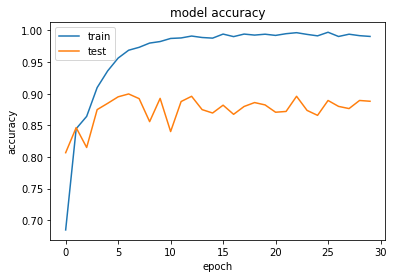

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



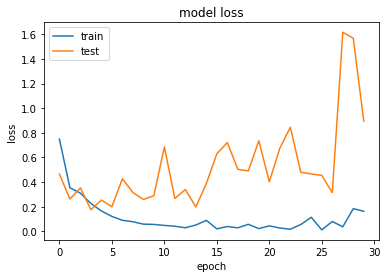

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[869 629]
 [595 429]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.59      0.58      0.59      1498
        Tamp       0.41      0.42      0.41      1024

    accuracy                           0.51      2522
   macro avg       0.50      0.50      0.50      2522
weighted avg       0.52      0.51      0.52      2522



In [108]:
x, y = validation_data.class_indices
print(x, y)

aut tamp


In [ ]:
#!cp -r path/to/google_drive_data_dir/ path/to/colab_data_dir

In [ ]:
#path of any test image
predict_path = "predict_images/i1_cm1.jpg"



In [ ]:
from IPython.display import Image as imgloader
display(imgloader(filename = predict_path, width = img_width, height=img_height))


In [ ]:
test_img = image.load_img(predict_path, target_size = (img_width, img_height))


test_img = convert_to_ela(test_img)



temp = test_img
test_image = image.img_to_array(test_img)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
temp


In [ ]:
train_data.class_indices

In [ ]:
result

In [ ]:
tamp = result[0][1]
if(tamp==1):
    print("Fake image, some tampering detected !")
else:
    print("The image looks authentic !")